## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler # Pre Processing feature scaling
from sklearn.model_selection import train_test_split # Training
from sklearn.linear_model import LinearRegression # Training
from sklearn.metrics import mean_squared_error # Evaluation



In [7]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.express as px
import plotly.graph_objects as GO 
import plotly.io as pio
import plotly.colors as color

## Data Collection

In [3]:
df =  pd.read_csv("Social_Media_Advertising.csv")

In [4]:
df

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2/25/2022,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,5/12/2022,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,6/19/2022,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,9/8/2022,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,8/24/2022,Hearth Harmony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,"$15,000.00",4.950000,Los Angeles,English,39999,119998,7,Technology,10/17/2022,Code Crafters
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,"$15,000.00",3.410000,Austin,Spanish,39999,119998,8,Technology,2/25/2022,Innovate Infinity
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,"$15,000.00",0.904461,Miami,French,23492,77476,1,Food,10/2/2022,Gastronomy Guild
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,"$15,000.00",7.430000,Las Vegas,Spanish,39999,119999,10,Food,1/24/2022,Savor Street


## Preprocessing 

In [5]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2/25/2022,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,5/12/2022,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,6/19/2022,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,9/8/2022,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,8/24/2022,Hearth Harmony


In [6]:
df.tail()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,"$15,000.00",4.950000,Los Angeles,English,39999,119998,7,Technology,10/17/2022,Code Crafters
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,"$15,000.00",3.410000,Austin,Spanish,39999,119998,8,Technology,2/25/2022,Innovate Infinity
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,"$15,000.00",0.904461,Miami,French,23492,77476,1,Food,10/2/2022,Gastronomy Guild
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,"$15,000.00",7.430000,Las Vegas,Spanish,39999,119999,10,Food,1/24/2022,Savor Street
299999,420183,Men 25-34,Brand Awareness,60 Days,Facebook,0.08,"$15,000.00",1.900000,Miami,English,40000,120000,10,Technology,7/18/2022,Innovate Infinity


In [7]:
df.describe

<bound method NDFrame.describe of         Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0            529013       Men 35-44    Product Launch  15 Days    Instagram   
1            275352     Women 45-60  Market Expansion  15 Days     Facebook   
2            692322       Men 45-60    Product Launch  15 Days    Instagram   
3            675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4            535900       Men 45-60  Market Expansion  15 Days    Pinterest   
...             ...             ...               ...      ...          ...   
299995       565525       Men 25-34  Market Expansion  60 Days    Instagram   
299996       539680     Women 25-34  Market Expansion  60 Days    Instagram   
299997       140032     Women 35-44   Brand Awareness  60 Days    Pinterest   
299998       161067     Women 18-24  Market Expansion  60 Days    Instagram   
299999       420183       Men 25-34   Brand Awareness  60 Days     Facebook   

        Conversio

In [8]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,550444.804487,0.080009,3.177691,18153.670370,56034.236387,4.369217
std,260252.586037,0.040563,2.461200,11027.023294,32583.136334,3.156492
min,100001.000000,0.010000,0.000000,293.000000,1937.000000,1.000000
25%,325003.500000,0.050000,0.930000,8821.000000,28362.000000,1.000000
50%,551164.500000,0.080000,2.670000,17230.000000,54098.000000,4.000000
75%,776284.500000,0.110000,5.330000,26808.000000,80925.250000,7.000000
max,999998.000000,0.150000,8.000000,40000.000000,120000.000000,10.000000


In [9]:
df.describe(include="all")

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
count,300000.000000,300000,300000,300000,300000,300000.000000,300000,300000.000000,300000,300000,300000.000000,300000.000000,300000.000000,300000,300000,300000
unique,NaN,9,4,4,4,NaN,250998,NaN,5,3,NaN,NaN,NaN,5,365,50
top,NaN,Women 18-24,Brand Awareness,15 Days,Facebook,NaN,"$15,000.00",NaN,Los Angeles,English,NaN,NaN,NaN,Health,2/28/2022,Balance Beam
freq,NaN,33593,75248,75000,75164,NaN,12065,NaN,60322,100116,NaN,NaN,NaN,60086,902,6163
mean,550444.804487,NaN,NaN,NaN,NaN,0.080009,NaN,3.177691,NaN,NaN,18153.670370,56034.236387,4.369217,NaN,NaN,NaN
std,260252.586037,NaN,NaN,NaN,NaN,0.040563,NaN,2.461200,NaN,NaN,11027.023294,32583.136334,3.156492,NaN,NaN,NaN
min,100001.000000,NaN,NaN,NaN,NaN,0.010000,NaN,0.000000,NaN,NaN,293.000000,1937.000000,1.000000,NaN,NaN,NaN
25%,325003.500000,NaN,NaN,NaN,NaN,0.050000,NaN,0.930000,NaN,NaN,8821.000000,28362.000000,1.000000,NaN,NaN,NaN
50%,551164.500000,NaN,NaN,NaN,NaN,0.080000,NaN,2.670000,NaN,NaN,17230.000000,54098.000000,4.000000,NaN,NaN,NaN
75%,776284.500000,NaN,NaN,NaN,NaN,0.110000,NaN,5.330000,NaN,NaN,26808.000000,80925.250000,7.000000,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

In [11]:
df.columns

Index(['Campaign_ID', 'Target_Audience', 'Campaign_Goal', 'Duration',
       'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI',
       'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Date', 'Company'],
      dtype='object')

## Handling null values:
- .isna() and .isnull(): Both are used to detect missing values (NaNs) in the data and return True for missing values.
- .notna() and .notnull(): Both are used to detect non-missing values and return True for values that exist.

In [12]:
df.isnull().sum()

Campaign_ID         0
Target_Audience     0
Campaign_Goal       0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
Company             0
dtype: int64

## duplicate values

In [13]:
df.duplicated

<bound method DataFrame.duplicated of         Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0            529013       Men 35-44    Product Launch  15 Days    Instagram   
1            275352     Women 45-60  Market Expansion  15 Days     Facebook   
2            692322       Men 45-60    Product Launch  15 Days    Instagram   
3            675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4            535900       Men 45-60  Market Expansion  15 Days    Pinterest   
...             ...             ...               ...      ...          ...   
299995       565525       Men 25-34  Market Expansion  60 Days    Instagram   
299996       539680     Women 25-34  Market Expansion  60 Days    Instagram   
299997       140032     Women 35-44   Brand Awareness  60 Days    Pinterest   
299998       161067     Women 18-24  Market Expansion  60 Days    Instagram   
299999       420183       Men 25-34   Brand Awareness  60 Days     Facebook   

        Conve

In [14]:
df.duplicated().sum()

np.int64(0)

## Change Date formate

In [15]:
# df['Date'] = pd.to_datetime(df['Date'])
# df.info()

In [16]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2/25/2022,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,5/12/2022,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,6/19/2022,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,9/8/2022,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,8/24/2022,Hearth Harmony


## String values convert into numerical values

In [17]:
df['Acquisition_Cost'].value_counts()

Acquisition_Cost
$15,000.00     12065
$500.00        12041
$10,480.82         5
$3,988.27          4
$4,253.06          4
               ...  
$504.67            1
$1,516.25          1
$504.86            1
$504.89            1
$502.62            1
Name: count, Length: 250998, dtype: int64

In [18]:
a = df['Acquisition_Cost']
b = len(a)
b

300000

In [19]:
c = a[280000]
print(c)

$14,352.22 


In [20]:
c = a[260000]
print(c)
c = c.replace("$","")
print(c)

$13,143.37 
13,143.37 


In [21]:
a = df['Acquisition_Cost']
b = len(a)
b


# c = a[0]
# print(c)
# c = c.replace("$","")
# print(c)

d = []

for i in range(b):
    c = a[i]
    #print(c)
    c = c.replace("$","")
    c = c.strip()
    d.append(c)
    
d
    

['500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',
 '500.00',

In [22]:
# a = d[0]
# d[0]=a.strip()
# d


# for i in range(len(d)):
#     a=d[i]
#     d[i]=a.strip()

# d

In [23]:
df['Acquisition_Cost'].value_counts()

Acquisition_Cost
$15,000.00     12065
$500.00        12041
$10,480.82         5
$3,988.27          4
$4,253.06          4
               ...  
$504.67            1
$1,516.25          1
$504.86            1
$504.89            1
$502.62            1
Name: count, Length: 250998, dtype: int64

In [24]:
d[290000]

'15,000.00'

In [25]:
df['Acquisition_Cost'] = d
df

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2/25/2022,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.00,7.210000,Los Angeles,French,500,3000,5,Home,5/12/2022,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.00,0.430000,Austin,Spanish,500,3000,9,Technology,6/19/2022,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.00,0.909824,Miami,Spanish,293,1937,1,Health,9/8/2022,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.00,1.422828,Austin,French,293,1937,1,Home,8/24/2022,Hearth Harmony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,"15,000.00",4.950000,Los Angeles,English,39999,119998,7,Technology,10/17/2022,Code Crafters
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,"15,000.00",3.410000,Austin,Spanish,39999,119998,8,Technology,2/25/2022,Innovate Infinity
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,"15,000.00",0.904461,Miami,French,23492,77476,1,Food,10/2/2022,Gastronomy Guild
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,"15,000.00",7.430000,Las Vegas,Spanish,39999,119999,10,Food,1/24/2022,Savor Street


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

In [27]:
df.Acquisition_Cost[290000] 
# df["Acquisition_Cost"].dtypes

'15,000.00'

In [28]:
# df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'])
# # df['Acquisition_Cost'] = df['Acquisition_Cost'].apply(float)

# Commas ko remove karne ke liye
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace(',', '')

In [29]:


# Ab to_numeric apply karein
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  float64
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(3), int64

In [30]:
# df.tail(3000)
df.Acquisition_Cost[290000] 

np.float64(15000.0)

In [31]:
df['Acquisition_Cost']

0           500.0
1           500.0
2           500.0
3           500.0
4           500.0
           ...   
299995    15000.0
299996    15000.0
299997    15000.0
299998    15000.0
299999    15000.0
Name: Acquisition_Cost, Length: 300000, dtype: float64

In [32]:
df['Acquisition_Cost'].dtypes

dtype('float64')

In [33]:
df['Acquisition_Cost'].value_counts()

Acquisition_Cost
15000.00    12065
500.00      12041
10480.82        5
3988.27         4
4253.06         4
            ...  
504.67          1
1516.25         1
504.86          1
504.89          1
502.62          1
Name: count, Length: 250998, dtype: int64

In [34]:
df['Acquisition_Cost'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300000 entries, 0 to 299999
Series name: Acquisition_Cost
Non-Null Count   Dtype  
--------------   -----  
300000 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [35]:
# df["Acquisition_Cost"] = Acquisition_Cost

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  float64
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(3), int64

In [37]:
df['ROI'].value_counts()

ROI
5.570000    345
1.360000    329
6.390000    329
3.770000    328
0.610000    327
           ... 
0.132273     68
1.233356     67
0.105461     67
1.288768     67
1.429978     48
Name: count, Length: 1601, dtype: int64

## handling missing values

In [38]:
df.isnull().sum()

Campaign_ID         0
Target_Audience     0
Campaign_Goal       0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
Company             0
dtype: int64

In [39]:
# Fill the missing values with the mean of the column .count()
# print(df['Acquisition_Cost'].mean())
# df['Acquisition_Cost'] =  df['Acquisition_Cost'].fillna(12.5)

# df.tail()

In [40]:
df.tail(100)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
299900,514207,Women 25-34,Product Launch,60 Days,Twitter,0.03,15000.0,2.380000,New York,Spanish,39986,119961,9,Home,3/16/2022,Dwell Delight
299901,163724,Men 45-60,Increase Sales,60 Days,Instagram,0.05,15000.0,1.460000,New York,Spanish,39987,119961,1,Home,1/17/2022,Living Luxe
299902,877365,Women 35-44,Market Expansion,60 Days,Facebook,0.14,15000.0,7.770000,Austin,French,39987,119962,7,Fashion,10/14/2022,Attire Artistry
299903,852233,Women 45-60,Market Expansion,60 Days,Instagram,0.10,15000.0,6.270000,Austin,English,39987,119962,2,Health,11/15/2022,Vigor Valley
299904,316480,Men 18-24,Brand Awareness,60 Days,Twitter,0.07,15000.0,1.060000,Austin,English,39987,119962,3,Fashion,1/25/2022,Glam Garments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,15000.0,4.950000,Los Angeles,English,39999,119998,7,Technology,10/17/2022,Code Crafters
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,15000.0,3.410000,Austin,Spanish,39999,119998,8,Technology,2/25/2022,Innovate Infinity
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,15000.0,0.904461,Miami,French,23492,77476,1,Food,10/2/2022,Gastronomy Guild
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,15000.0,7.430000,Las Vegas,Spanish,39999,119999,10,Food,1/24/2022,Savor Street


In [41]:
df.Acquisition_Cost[18949] 

np.float64(1071.44)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  float64
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(3), int64

<!-- ## Model Train -->

# Splitting the data into features and labels




In [43]:
x = df[['Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score', 'Conversion_Rate']]
# df[x]
x

,Acquisition_Cost,Clicks,Impressions,Engagement_Score,Conversion_Rate
0,500.0,500,3000,7,0.15
1,500.0,500,3000,5,0.01
2,500.0,500,3000,9,0.08
3,500.0,293,1937,1,0.03
4,500.0,293,1937,1,0.13
...,...,...,...,...,...
299995,15000.0,39999,119998,7,0.14
299996,15000.0,39999,119998,8,0.08
299997,15000.0,23492,77476,1,0.09
299998,15000.0,39999,119999,10,0.13


In [44]:
y = df['ROI']
y

0         5.790000
1         7.210000
2         0.430000
3         0.909824
4         1.422828
            ...   
299995    4.950000
299996    3.410000
299997    0.904461
299998    7.430000
299999    1.900000
Name: ROI, Length: 300000, dtype: float64

In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Training Closed

In [47]:
X_test

,Acquisition_Cost,Clicks,Impressions,Engagement_Score,Conversion_Rate
4941,500.00,1150,4926,1,0.04
51775,2977.30,7317,23192,9,0.10
115253,6064.53,15675,47948,8,0.13
299321,15000.00,39910,119735,4,0.15
173570,8899.65,23353,70692,6,0.15
...,...,...,...,...,...
255501,12905.53,20051,66272,1,0.10
146711,7599.74,19817,60217,6,0.02
254979,12877.62,20011,66141,1,0.05
250029,12627.12,19628,64894,1,0.10


In [48]:
y_test

4941      6.790000
51775     2.080000
115253    4.490000
299321    4.190000
173570    5.090000
            ...   
255501    0.636340
146711    3.960000
254979    0.616678
250029    1.104658
228965    0.529092
Name: ROI, Length: 90000, dtype: float64

In [49]:
model.coef_

array([-0.0034367 , -0.00701666,  0.00281129,  0.05496717, -0.03711975])

In [50]:
model.intercept_

np.float64(-0.5578392031144936)

In [53]:
# Making predictions / testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred


array([3.55652979, 3.5595207 , 3.84452152, ..., 0.76967194, 0.8104158 ,
       0.94499578])

In [54]:


# Step 5: Calculate and print the training and testing errors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f" 'Y' Traning Predict: {y_train_pred}")
print(f" 'Y' Test Predict: {y_test_pred}")

print(f'Training Error: {mean_squared_error(y_train, y_train_pred)}')
print(f'Testing Error: {mean_squared_error(y_test, y_test_pred)}')

 'Y' Traning Predict: [4.29981823 3.61664457 3.86688146 ... 3.81329394 3.88847631 3.72077685]
 'Y' Test Predict: [3.55652979 3.5595207  3.84452152 ... 0.76967194 0.8104158  0.94499578]
Training Error: 4.290057812706788
Testing Error: 4.295510436499401


In [55]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
df_train 
# Add a column to distinguish between train and test data
df_train['Type'] = 'Train'
df_train


,Actual,Predicted,Type
186295,5.450000,4.299818,Train
127847,3.740000,3.616645,Train
274740,4.990000,3.866881,Train
74908,7.850000,3.419504,Train
11630,1.270893,3.087902,Train
...,...,...,...
119879,0.670302,1.068920,Train
259178,6.120000,4.283941,Train
131932,3.140000,3.813294,Train
146867,3.350000,3.888476,Train


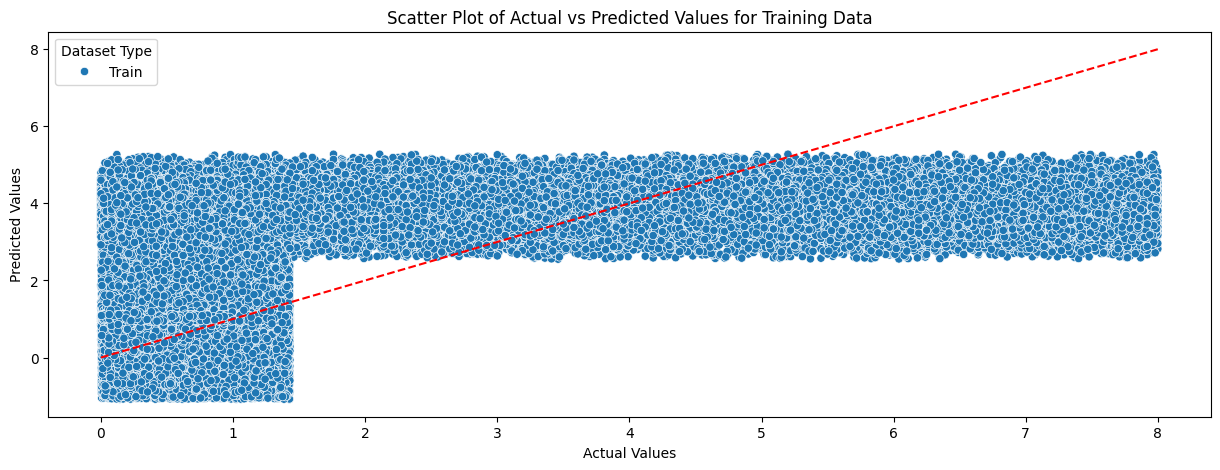

In [ ]:
# fig = px.bar(df_train, x = 'Actual' , y = 'Predicted',title = "In Training Time: Actual vs Predicted")
# fig.show() 



#Plotting with seaborn

plt.figure(figsize=(15, 5))
sns.scatterplot(x='Actual', y='Predicted', hue='Type', data=df_train )

plt.title('Scatter Plot of Actual vs Predicted Values for Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Dataset Type')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Line of equality
plt.show()

In [57]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_test['Type'] = 'Test'
df_test

,Actual,Predicted,Type
4941,6.790000,3.556530,Test
51775,2.080000,3.559521,Test
115253,4.490000,3.844522,Test
299321,4.190000,4.680451,Test
173570,5.090000,4.056373,Test
...,...,...,...
255501,0.636340,0.759510,Test
146711,3.960000,3.891283,Test
254979,0.616678,0.769672,Test
250029,1.104658,0.810416,Test


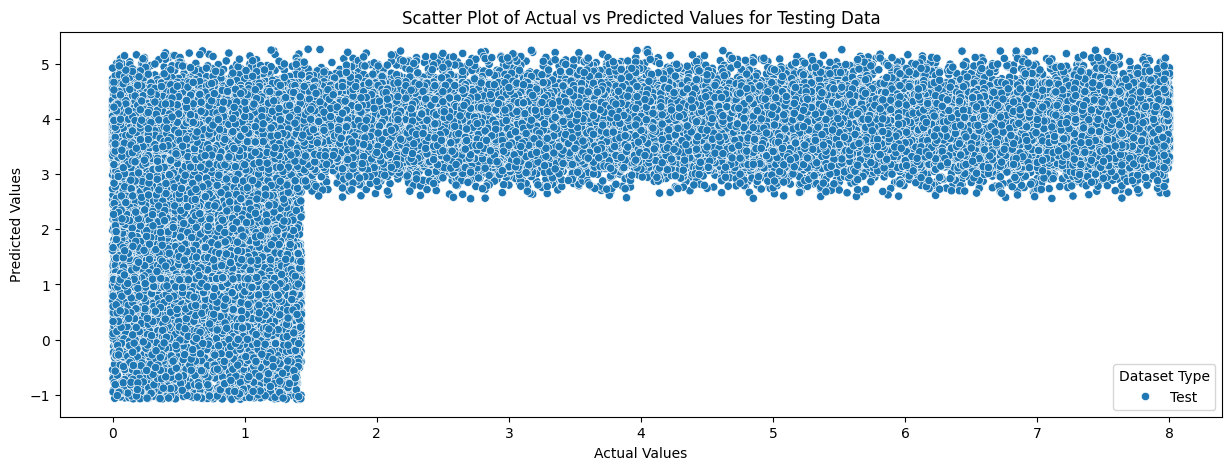

In [59]:
#Plotting with seaborn

plt.figure(figsize=(15, 5))
sns.scatterplot(x='Actual', y='Predicted', hue='Type', data=df_test )

plt.title('Scatter Plot of Actual vs Predicted Values for Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Dataset Type')
# plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Line of equality
plt.show()

In [58]:
# Combine the two DataFrames
df_combined = pd.concat([df_train, df_test], ignore_index=True)
df_combined

,Actual,Predicted,Type
0,5.450000,4.299818,Train
1,3.740000,3.616645,Train
2,4.990000,3.866881,Train
3,7.850000,3.419504,Train
4,1.270893,3.087902,Train
...,...,...,...
299995,0.636340,0.759510,Test
299996,3.960000,3.891283,Test
299997,0.616678,0.769672,Test
299998,1.104658,0.810416,Test


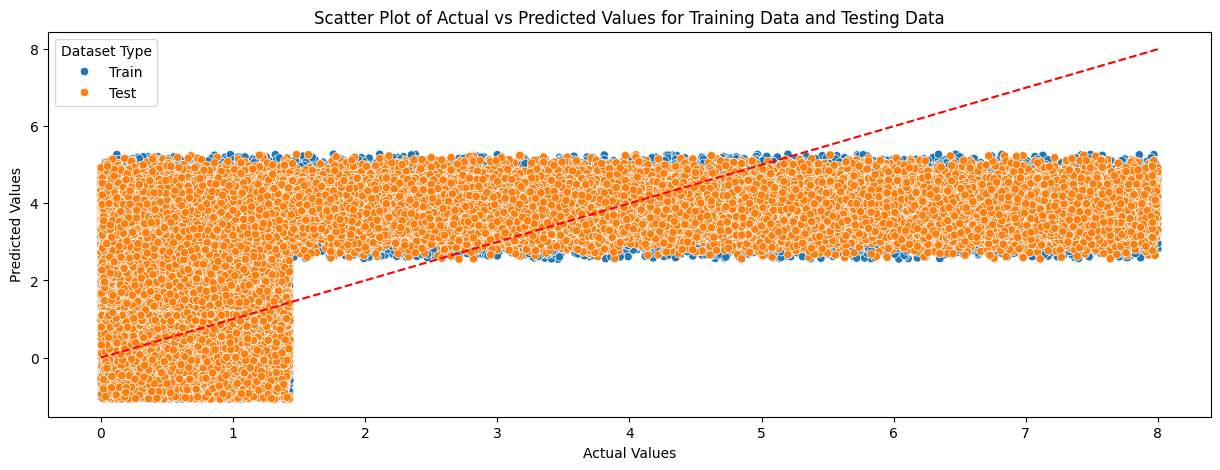

In [66]:
#Plotting with seaborn

plt.figure(figsize=(15, 5))
sns.scatterplot(x='Actual', y='Predicted', hue='Type', data=df_combined )

plt.title('Scatter Plot of Actual vs Predicted Values for Training Data and Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Dataset Type')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Line of equality
plt.show()

In [60]:
# # Melt the DataFrame for seaborn
# df_melted = pd.melt(df_combined, id_vars=['Type'], value_vars=['Actual', 'Predicted'])
# df_melted

C:\Users\Atif Ali Siddiqui\AppData\Local\Temp\ipykernel_8020\1200749552.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Actual', y='Predicted', hue='Type', data=df_combined, ci=None )


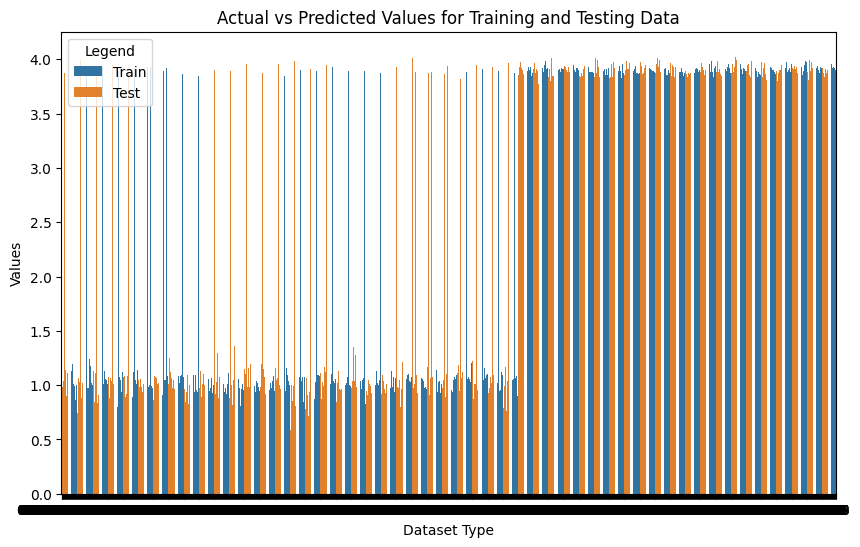

In [68]:
# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Actual', y='Predicted', hue='Type', data=df_combined, ci=None )

plt.title('Actual vs Predicted Values for Training and Testing Data')
plt.xlabel('Dataset Type')
plt.ylabel('Values')
plt.legend(title='Legend')
plt.show()

## Checking Through User input

In [166]:
data = {
    'Acquisition_Cost': [100],
    'Clicks': [265],
    'Impressions':[154],
    'Engagement_Score':[520],
    'Conversion_Rate': [154]
}


In [167]:
dataa = pd.DataFrame(data)
dataa

,Acquisition_Cost,Clicks,Impressions,Engagement_Score,Conversion_Rate
0,100,265,154,520,154


In [169]:
y_pred = model.predict(dataa)
y_pred

array([20.53849954])

In [73]:
# Taking user input for 5 features
Acquisition_Cost = float(input("Enter Acquisition_Cost: "))
Clicks = float(input("Enter Clicks: "))
Impressions = float(input("Enter Impressions: "))
Engagement_Score = float(input("Enter Engagement_Score: "))
Conversion_Rate = float(input("Enter Conversion_Rate: "))

# Prepare the input array
input_values = np.array([[Acquisition_Cost, Clicks, Impressions, Engagement_Score, Conversion_Rate]])

# Predict using the model
prediction = model.predict(input_values)

# Print the input values and the prediction
print(f"Input Values:")
print(f"Acquisition_Cost: {Acquisition_Cost}")
print(f"Clicks: {Clicks}")
print(f"Impressions: {Impressions}")
print(f"Engagement_Score: {Engagement_Score}")
print(f"Conversion_Rate: {Conversion_Rate}")
print(f"Your Return on Investment is: {prediction[0]} values")

Input Values:
Acquisition_Cost: 4569.0
Clicks: 4587.0
Impressions: 254.0
Engagement_Score: 56325.0
Conversion_Rate: 4587.0
Your Return on Investment is: 2878.0259195756166 values


f:\installed software\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (3556208879.py, line 1)

## Feature Scaling 

In [240]:
# # Identify categorical columns in the dataset
# categorical_columns = df.select_dtypes(include=['object']).columns
# print("\nCategorical Columns:")
# print(categorical_columns)


Categorical Columns:
Index(['Target_Audience', 'Campaign_Goal', 'Duration', 'Channel_Used',
       'Location', 'Language', 'Customer_Segment', 'Company'],
      dtype='object')


In [238]:
# # Identifying columns that may require feature scaling
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# print("\nNumerical Columns:")
# print(numerical_features)


Numerical Columns:
Index(['Campaign_ID', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks',
       'Impressions', 'Engagement_Score'],
      dtype='object')


In [241]:
# for column in numerical_features:
#     column_range = df[column].max() - df[column].min()
#     print(f"Range of column '{column}': {column_range} ")

Range of column 'Campaign_ID': 899997 
Range of column 'Conversion_Rate': 0.13999999999999999 
Range of column 'Acquisition_Cost': 499.88 
Range of column 'ROI': 8.0 
Range of column 'Clicks': 39707 
Range of column 'Impressions': 118063 
Range of column 'Engagement_Score': 9 


## Splitting the data into features and labels

X = df.drop('price', axis=1)
y = boston['price']
